---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from IPython import display
from matplotlib.animation import FuncAnimation

# Eigenfrequencies

Consider a chain of four identical masses connected by five ideal springs. Neglect the effects of gravity for simplicity. In this program, I will be making an animation that shows the chain vibrating horizontally at each of its four *eigenfrequencies* (neglecting the effects of gravity, for simplicity).

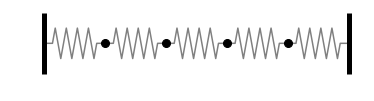

Let $x_0$, $x_1$, $x_2$, and $x_3$ be the horizontal displacement of each mass from equilibrium, numbered from left to right. (For example, in the figure above, $x_0 = x_1 = x_2 = x_3 = 0$. The potential energy of the chain is

$$U = \tfrac12 k x_0^2 + \tfrac12 k(x_1-x_0)^2 + \tfrac12 k(x_2-x_1)^2 + \tfrac12 k(x_3-x_2)^2 + \tfrac12 k x_3^2\,,$$     

where there is one term for each of the five springs.

Using

$$F_j=-\frac{\partial U}{\partial x_j} = m\ddot{x_j}\,,$$

one can obtain the four equations of motion that govern the four masses by substituting in $U$ and evaluating for each possible value of $j$. 

To find the eigenfrequencies $\omega$ of the system, we exploit the fact that the solution to a simple harmonic oscillator takes the form $\ddot{x_i} = -\omega^2 x_i$.
We can put these four equations into the form of a matrix equation:

$$\mathbf{Mx}=\frac{\omega^2}{\omega_0^2}\mathbf{x}\,,$$

where $\mathbf{M}$ is a matrix with the coefficients from the equation of motion and $\omega_0=\sqrt{k/m}$ is the natural frequency of each spring. Choose units where $\omega_0 = 1$, again for simplicity. The equation as it stands now is a straightforward eigenvalue problem.

$$\mathbf{Mx}=\omega^2\mathbf{x}\,$$

where $\omega$ are the angular *eigenfrequencies*. Since these are the square root of eigenvalues, they must all be real numbers.

To understand the significance of these eigenfrequencies, it is important to recall that the time-dependent solution to a simple harmonic oscillator is the real part of

$$x_j(t) = A_j e^{\mathrm{i}\omega t}\,,$$

where $A_j$ is the complex amplitude. (The complex nature of $A_j$ allows for different phase&mdash;the magnitude of $A_j$ is what we normally call "amplitude".) In other words, when the chain is driven at an arbitrary frequency $\omega$, all four masses move with that same frequency, but different amplitudes and phases. In general, the values of these amplitudes and phases are not obvious.

However, if the system is driven at an eigenfrequency, the resulting amplitudes are all real, and the amplitudes of the four masses are exactly the elements of the associated eigenvector.

The following program will make an animation that shows the chain moving at each of its four eigenfrequencies.

In [4]:
# The following two functions are used for drawing the springs
# The springs consist of a series of 5 zig-zags with black
# dots separating them and black bars bookending

def draw_spring(left, right):
    """
    Draws a horizontal spring.
    Inputs: left  = x-coord of left side
            right = x-coord of right side
    """
    dy = 0.5
    x = np.linspace(left, right, 23)
    y = np.array([0]*4 + [dy, 0, -dy, 0]*4 + [0]*3) # zig-zag shape for spring
    spring = plt.Line2D(x, y, linestyle="-", color="gray", zorder=-1)
    ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else


def draw_chain(x_offsets):
    """
    Draw a chain of five springs and four masses.
    Input: x_offsets = list of displacements from equilibrium
    """
    x = np.arange(2, 10, 2) + x_offsets
    #print(x)
    
    # draw springs
    draw_spring(0, x[0],)
    draw_spring(x[0], x[1])
    draw_spring(x[1], x[2])
    draw_spring(x[2], x[3])
    draw_spring(x[3], 10)
    
    # draw masses
    plt.plot(x, [0, 0, 0, 0], "ko", ms=8)
    
    # draw vertical bars at edges
    plt.vlines([0, 10], -1, 1, "k", lw=5)

In [5]:
fig = plt.figure()
plt.axis("scaled")
pbar = display.ProgressBar(100)
pbar.display()

# matrix determined from finding the four partial derivatives from the first equation
M = np.array([[2, -1, 0, 0],
              [-1, 2, -1, 0],
              [0, -1, 2, -1],
              [0, 0, -1, 2]])

# Use scipy's linalg module to solve the eigenvalue equation
omega_2, eigvecs = linalg.eigh(M)
omega = np.sqrt(omega_2)

# linalg.eigh() returns the eigenvectors as the columns of a matrix.
# Transpose the matrix for ease of access to the components of each eigenvector
A = eigvecs.T

def animate(frame):
    # The value by which the frame counts are divided was chosen to
    # slow down the animations.
    # Also I set the axis ticks to be empty rather than just turning off
    # the axes so that I could put labels under the third and fouth modes,
    # and then I thought that the boxes look neater so I kept them on all four.
    
    
    fig.clear()
    # plot each eigenfrequency in its own subplot for ease of viewing
    # in comparison to the other eigenfrequencies
    plt.subplot(221)
    plt.title("First Mode")
    plt.xticks([])
    plt.yticks([])
    # A[0] is first eigenvector, A[1] is the second, etc.
    x0_t = A[0][0]*np.cos(omega[0]*frame/10)  # cosine is the real part of e^(iωt), which is the part we want
    x1_t = A[0][1]*np.cos(omega[0]*frame/10)
    x2_t = A[0][2]*np.cos(omega[0]*frame/10)
    x3_t = A[0][3]*np.cos(omega[0]*frame/10)
    draw_chain([x0_t, x1_t, x2_t, x3_t])
    
    plt.subplot(222)
    plt.title("Second Mode")
    plt.xticks([])
    plt.yticks([])
    # second eigenfrequency
    x0_t = A[1][0]*np.cos(omega[1]*frame/10)
    x1_t = A[1][1]*np.cos(omega[1]*frame/10)
    x2_t = A[1][2]*np.cos(omega[1]*frame/10)
    x3_t = A[1][3]*np.cos(omega[1]*frame/10)
    draw_chain([x0_t, x1_t, x2_t, x3_t])
    
    plt.subplot(223)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Third Mode", fontsize = 13)
    # third eigenfrequency
    x0_t = A[2][0]*np.cos(omega[2]*frame/10)
    x1_t = A[2][1]*np.cos(omega[2]*frame/10)
    x2_t = A[2][2]*np.cos(omega[2]*frame/10)
    x3_t = A[2][3]*np.cos(omega[2]*frame/10)
    draw_chain([x0_t, x1_t, x2_t, x3_t])
    
    plt.subplot(224)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Fourth Mode", fontsize = 13)
    # fourth eigenfrequency
    x0_t = A[3][0]*np.cos(omega[3]*frame/10)
    x1_t = A[3][1]*np.cos(omega[3]*frame/10)
    x2_t = A[3][2]*np.cos(omega[3]*frame/10)
    x3_t = A[3][3]*np.cos(omega[3]*frame/10)
    draw_chain([x0_t, x1_t, x2_t, x3_t])
    pbar.progress = frame + 1
    
anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

[============================================================] 100/100